![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/Identify_intent_in_general_text.ipynb)


#[Identify intent in general text - SNIPS dataset](https://nlp.johnsnowlabs.com/2021/02/15/classifierdl_use_snips_en.html)

Understand general commands and recognise the intent.



This model can be used by services such as Alexa and Google Nest to understand the intent after converting speech to text and can help improve the user experince greatly.



<br>

This model can be used to predict the following news categories 
`AddToPlaylist`, `BookRestaurant`, `GetWeather`, `PlayMusic`, `RateBook`, `SearchCreativeWork`, `SearchScreeningEvent`

<br>




The data Source used to train this can be found [here](https://github.com/MiuLab/SlotGated-SLU)

<br>

##Benchmark on Dataset 
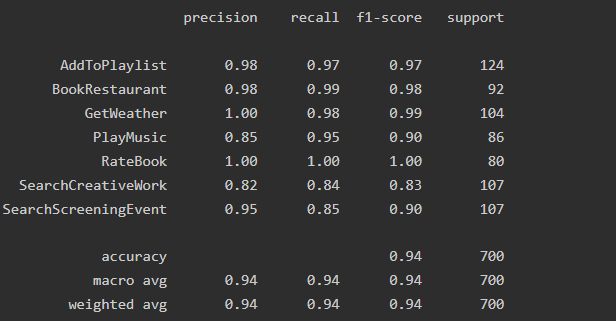

##1.Setup Java 8 and NLU

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash

import nlu

--2022-05-19 22:10:57--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2022-05-19 22:10:57 (33.5 MB/s) - written to stdout [1665/1665]

Installing  NLU 3.4.4rc1 with  PySpark 3.0.3 and Spark NLP 3.4.3 for Google Colab ...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/ma

##2.Load the mdoel and make Sample Predictions 

In [ ]:
pipeline = nlu.load('en.ner.snips')
pipeline.predict("Hey should we go grab a bite at a resturant?")

classifierdl_use_snips download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_use,snips,snips_confidence_confidence
0,Hey should we go grab a bite at a resturant?,"[-0.059718165546655655, 0.050846636295318604, ...",BookRestaurant,1.0


##3.Define Sample Sentences

In [ ]:
sample_sentences = [
"i want to bring six of us to a bistro in town that serves hot chicken sandwich that is within the same area", 
"show weather forcast for the  stone memorial st  joseph peninsula state park on one hour from now",
"Play the latest album  from Drake "
]

##4.Predict on Sample Sentences

In [ ]:
pipeline.predict(sample_sentences)

,sentence,sentence_embedding_use,snips,snips_confidence_confidence
0,i want to bring six of us to a bistro in town ...,"[0.032974954694509506, 0.026566199958324432, -...",BookRestaurant,1.0
1,show weather forcast for the stone memorial st...,"[-0.02467229776084423, 0.05650756135582924, -0...",GetWeather,1.0
2,Play the latest album from Drake,"[-0.01043702568858862, -0.039566561579704285, ...",PlayMusic,0.999877


##5.Take a look at the parmaters of the pipeline

In [ ]:
pipeline.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['classifier_dl@tfhub_use'] has settable params:
component_list['classifier_dl@tfhub_use'].setClasses(['PlayMusic', 'BookRestaurant', 'RateBook', 'SearchScreeningEvent', 'SearchCreativeWork', 'AddToPlaylist', 'GetWeather'])  | Info: get the tags used to trained this ClassifierDLModel | Currently set to : ['PlayMusic', 'BookRestaurant', 'RateBook', 'SearchScreeningEvent', 'SearchCreativeWork', 'AddToPlaylist', 'GetWeather']
component_list['classifier_dl@tfhub_use'].setStorageRef('tfhub_use')  | Info: unique reference name for identification | Currently set to : tfhub_use
>>> component_list['universal_sentence_encoder@tfhub_use'] has settable params:
component_list['universal_sentence_encoder@tfhub_use'].setDimension(512)  | Info: Number of embedding dimensions | Currently set to : 512
component_list['universal_sentence_encoder@tfhub_use'].setLoadSP(False)  | Info: Whethe

Looking Good! Let's test this model on a labelled dataset to see how it performs 

##6.Download Data

we are going to test the model on [this](https://github.com/MiuLab/SlotGated-SLU) dataset 




In [ ]:
!wget http://ckl-it.de/wp-content/uploads/2022/05/Data.csv

--2022-05-19 22:12:57--  http://ckl-it.de/wp-content/uploads/2022/05/Data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975295 (952K) [text/csv]
Saving to: ‘Data.csv’

Data.csv            100%[===================>] 952.44K  1.01MB/s    in 0.9s    

2022-05-19 22:12:59 (1.01 MB/s) - ‘Data.csv’ saved [975295/975295]



In [ ]:
import pandas  as pd 
df = pd.read_csv("Data.csv")
df.y = df.y.str.replace("\n","")
df

,Text,y
0,me maggie and ellen want to eat at lentil as ...,BookRestaurant
1,add the singer maxine nightingale to the spani...,AddToPlaylist
2,put jim fairchild onto spotlight spain 2016\n,AddToPlaylist
3,play movement by duane allman \n,PlayMusic
4,rate the descendants two points\n,RateBook
...,...,...
14479,book me a table for a party of eight in german...,BookRestaurant
14480,add cary brothers to rock the 2000 s playlist\n,AddToPlaylist
14481,is it going to be rainy here one second from n...,GetWeather
14482,i would give feast of the innocents a value of...,RateBook


Let's take  a Peek at the distribution of the labels 

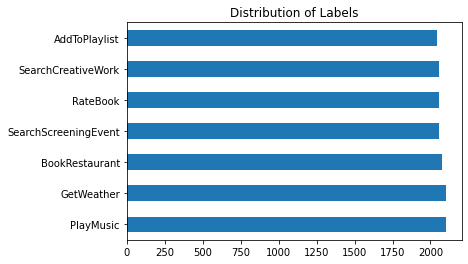

In [ ]:
df.y.value_counts().plot.barh(title='Distribution of Labels')

##7.Make Predictions with the model

In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions

,document,sentence_embedding_use,snips,snips_confidence_confidence,text,y
0,me maggie and ellen want to eat at lentil as a...,"[[-0.017013607546687126, 0.034057579934597015,...",BookRestaurant,1.0,me maggie and ellen want to eat at lentil as ...,BookRestaurant
1,add the singer maxine nightingale to the spani...,"[[-0.058401599526405334, 0.030685268342494965,...",AddToPlaylist,1.0,add the singer maxine nightingale to the spani...,AddToPlaylist
2,put jim fairchild onto spotlight spain 2016,"[[0.07778624445199966, -0.04414999112486839, -...",AddToPlaylist,0.999995,put jim fairchild onto spotlight spain 2016\n,AddToPlaylist
3,play movement by duane allman,"[[-0.019449099898338318, -0.016717910766601562...",PlayMusic,1.0,play movement by duane allman \n,PlayMusic
4,rate the descendants two points,"[[-0.07902456074953079, -0.0464814268052578, 0...",RateBook,1.0,rate the descendants two points\n,RateBook
...,...,...,...,...,...,...
14479,book me a table for a party of eight in germany,"[[-0.0052231671288609505, 0.010193767957389355...",BookRestaurant,1.0,book me a table for a party of eight in german...,BookRestaurant
14480,add cary brothers to rock the 2000 s playlist,"[[-0.025543220341205597, 0.022171588614583015,...",AddToPlaylist,1.0,add cary brothers to rock the 2000 s playlist\n,AddToPlaylist
14481,is it going to be rainy here one second from now,"[[-0.06673435866832733, 0.030579980462789536, ...",GetWeather,1.0,is it going to be rainy here one second from n...,GetWeather
14482,i would give feast of the innocents a value of 1,"[[-0.021519748494029045, -0.04700062796473503,...",RateBook,1.0,i would give feast of the innocents a value of...,RateBook


## 8.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['y'], predctions['snips']) )

                      precision    recall  f1-score   support

       AddToPlaylist       0.99      0.99      0.99      2042
      BookRestaurant       0.99      1.00      1.00      2073
          GetWeather       1.00      0.99      1.00      2100
           PlayMusic       0.96      0.97      0.97      2100
            RateBook       1.00      1.00      1.00      2056
  SearchCreativeWork       0.94      0.95      0.94      2054
SearchScreeningEvent       0.98      0.96      0.97      2059

            accuracy                           0.98     14484
           macro avg       0.98      0.98      0.98     14484
        weighted avg       0.98      0.98      0.98     14484



# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)